In [31]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix,classification_report

import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


## Data Loading

In [6]:
mnist = tf.keras.datasets.mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [0]:
X_train = X_train / 255
X_test = X_test / 255

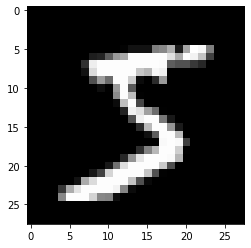

In [14]:
plt.imshow(X_train[0],cmap='gray')

## Model

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=[28,28]),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(10,activation='softmax')
                            ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=10,
          validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2949 - accuracy: 0.9150 - val_loss: 0.1407 - val_accuracy: 0.9576
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1449 - accuracy: 0.9571 - val_loss: 0.0977 - val_accuracy: 0.9698
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1103 - accuracy: 0.9663 - val_loss: 0.0879 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0889 - accuracy: 0.9727 - val_loss: 0.0790 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0766 - accuracy: 0.9753 - val_loss: 0.0756 - val_accuracy: 0.9769
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0663 - accuracy: 0.9787 - val_loss: 0.0759 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0611 - accuracy: 0.9797 - val_loss: 0.0711 - val_accuracy:

In [21]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.294917,0.915017,0.140668,0.9576
1,0.144888,0.957150,0.097745,0.9698
2,0.110327,0.966333,0.087887,0.9726
3,0.088884,0.972667,0.078952,0.9764
4,0.076589,0.975317,0.075627,0.9769
5,0.066333,0.978717,0.075884,0.9765
6,0.061097,0.979650,0.071103,0.9789
7,0.052718,0.982350,0.077991,0.9790
8,0.049155,0.983517,0.069398,0.9805
9,0.045632,0.985067,0.073825,0.9790


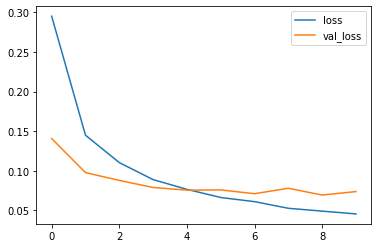

In [23]:
plt.plot(losses['loss'],label='loss')
plt.plot(losses['val_loss'],label='val_loss')
plt.legend()

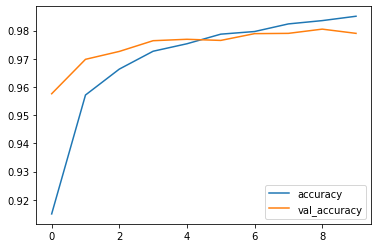

In [24]:
plt.plot(losses['accuracy'],label='accuracy')
plt.plot(losses['val_accuracy'],label='val_accuracy')
plt.legend()

## Evalute Model

In [27]:
print(model.evaluate(X_test,y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0738 - accuracy: 0.9790
[0.07382547855377197, 0.9789999723434448]


In [30]:
pred = model.predict_classes(X_test)
print(confusion_matrix(y_test,pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[ 969    0    3    0    0    0    3    2    3    0]
 [   0 1125    4    0    0    1    2    0    3    0]
 [   1    0 1013    1    2    0    2    8    4    1]
 [   0    0    7  992    0    2    0    4    3    2]
 [   1    1    2    1  957    0    5    4    2    9]
 [   2    0    0   14    1  862    5    1    6    1]
 [   4    2    1    1    1    4  942    0    3    0]
 [   2    4   12    2    0    0    0 1002    3    3]
 [   2    0    3    2    4    1    1    7  953    1]
 [   1    6    0    7    6    2    1    8    3  975]]


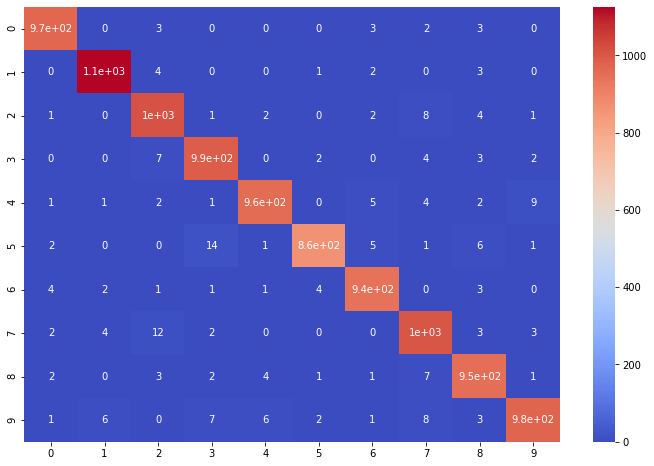

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,pred),annot=True,cmap='coolwarm')

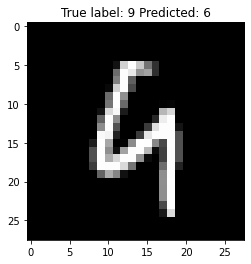

In [50]:
misclassified_idx = np.where(pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title('True label: %s Predicted: %s' %(y_test[i],pred[i]))
plt.show()